# Análisis
## Pablo Escobar
## Eduardo Ramírez

In [3]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('movie_statistic_dataset.csv')
data.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


In [7]:
# get only numeric data
dfNumericColumns = data.select_dtypes(include=[np.number])
dfNumericColumns.head()

,runtime_minutes,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,192.0,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,181.0,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,137.0,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,141.0,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,149.0,8.4,1091968.0,8.460958,300000000,678815482,2048359754


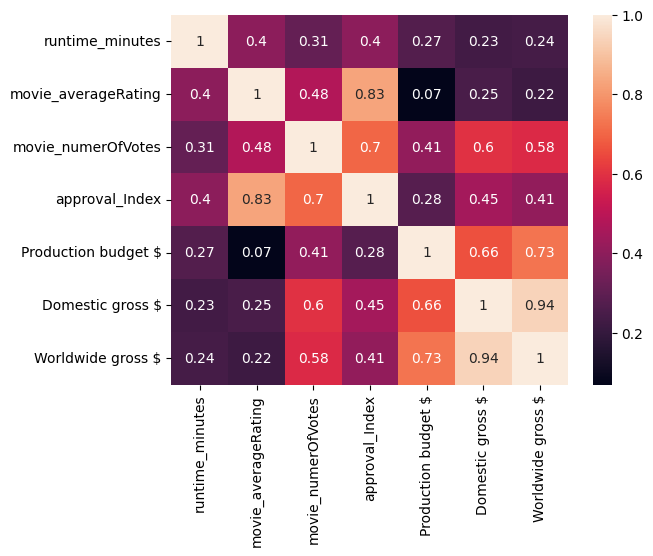

In [8]:
matrix = dfNumericColumns.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()


relaciones interesantes: budget -> ww gross, domestic gross

In [9]:
# get list of genres
data['genres_list'] = data['genres'].str.split(',')

# Use the explode function to create a new DataFrame with one row per genre
genres_df = data.explode('genres_list')

# Get the unique genres from the new DataFrame
unique_genres = genres_df['genres_list'].unique()

# Print the unique genres
print(unique_genres)

['Action' 'Adventure' 'Fantasy' 'Drama' 'Sci-Fi' 'Thriller' 'Animation'
 'Comedy' 'Family' 'Crime' 'Mystery' 'Western' 'Romance' 'Musical'
 'Horror' 'History' 'Biography' 'Documentary' 'War' 'Sport' 'Music' '\\N'
 'Film-Noir' 'News']


In [22]:
genresGross = {}
df = data
print(df.columns)
for genre in unique_genres:
    filtered_df = df[df['genres_list'].apply(lambda x: genre in x)]
    genresGross[genre] = filtered_df['Worldwide gross $'].sum()

  

Index(['movie_title', 'production_date', 'genres', 'runtime_minutes',
       'director_name', 'director_professions', 'director_birthYear',
       'director_deathYear', 'movie_averageRating', 'movie_numerOfVotes',
       'approval_Index', 'Production budget $', 'Domestic gross $',
       'Worldwide gross $', 'genres_list'],
      dtype='object')
{'Action': 230670932680, 'Adventure': 245567199320, 'Fantasy': 62831538683, 'Drama': 162308419288, 'Sci-Fi': 85006509325, 'Thriller': 71708423300, 'Animation': 73428375236, 'Comedy': 171444135993, 'Family': 38870706095, 'Crime': 60068017038, 'Mystery': 35040516805, 'Western': 2477294419, 'Romance': 49676857915, 'Musical': 4635227205, 'Horror': 32131733520, 'History': 8994956562, 'Biography': 21275934158, 'Documentary': 1879841801, 'War': 5328855292, 'Sport': 5793689316, 'Music': 8010333908, '\\N': 116304148, 'Film-Noir': 60016884, 'News': 53365925}


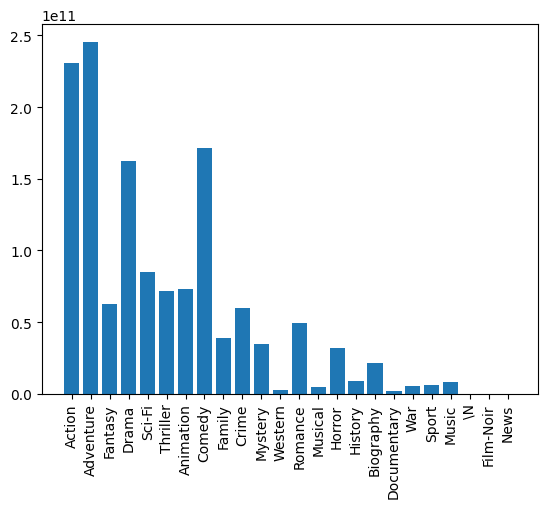

In [23]:
plt.bar(genresGross.keys(), genresGross.values())
plt.xticks(rotation=90)
plt.show()

otra relacion interesante: genero con las ganancias

In [25]:
# drop rows with director_name == NaN
df = df.dropna(subset=['director_name'])
# drop rows with director_name == '-'
df = df[df.director_name != '-']
df.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,genres_list
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552,"[Action, Adventure, Fantasy]"
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802,"[Action, Adventure, Fantasy]"
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979,"[Action, Adventure, Sci-Fi]"
5,Justice League,2017-11-13,"Action,Adventure,Fantasy",120.0,Zack Snyder,"director,producer,writer",1966,alive,6.1,456977.0,5.717212,300000000,229024295,655945209,"[Action, Adventure, Fantasy]"
6,Spectre,2015-10-06,"Action,Adventure,Thriller",148.0,Sam Mendes,"producer,director,miscellaneous",1965,alive,6.8,445461.0,6.375644,300000000,200074175,879077344,"[Action, Adventure, Thriller]"


In [26]:
uniqueDirectors = df['director_name'].unique()
print(uniqueDirectors)

['James Cameron' 'Rob Marshall' 'Joss Whedon' ... 'Vincent Jay Miller'
 'Lena Dunham' 'Jem Cohen']


In [27]:
directorsGross = {}
df = data
for director in uniqueDirectors:
    filtered_df = df[df['director_name'].apply(lambda x: director == x)]
    directorsGross[director] = filtered_df['Worldwide gross $'].sum()


{'James Cameron': 8608634904, 'Rob Marshall': 2132296768, 'Joss Whedon': 2950736630, 'Zack Snyder': 2716244049, 'Sam Mendes': 3105017702, 'Ron Howard': 3708321100, 'Andrew Stanton': 282778100, 'Jon Favreau': 4037986303, 'Sam Raimi': 4085324735, 'Taika Waititi': 1722189774, 'David Yates': 4082672812, 'Peter Jackson': 6496046429, 'F. Gary Gray': 2251158095, 'Cary Joji Fukunaga': 760050439, 'Bryan Singer': 3296628273, 'Christopher Nolan': 4920972587, 'Marc Forster': 1715578534, 'Andrew Adamson': 451494389, 'Gore Verbinski': 914650412, 'Marc Webb': 1503851259, 'Peter Berg': 1579689134, 'Michael Bay': 6374256745, 'Colin Trevorrow': 2678161591, 'Barry Sonnenfeld': 1882353781, 'Brett Ratner': 2112961482, 'Ridley Scott': 4220781680, 'Chris Weitz': 1074316635, 'Jon Watts': 2788463194, 'Ryan Coogler': 1527611546, 'Brad Bird': 2112207886, 'Gareth Edwards': 1589799395, 'Josh Cooley': 1073064540, 'Lee Unkrich': 1068879522, 'Shane Black': 1434476582, 'Matt Reeves': 2172997671, 'Tim Burton': 38081980

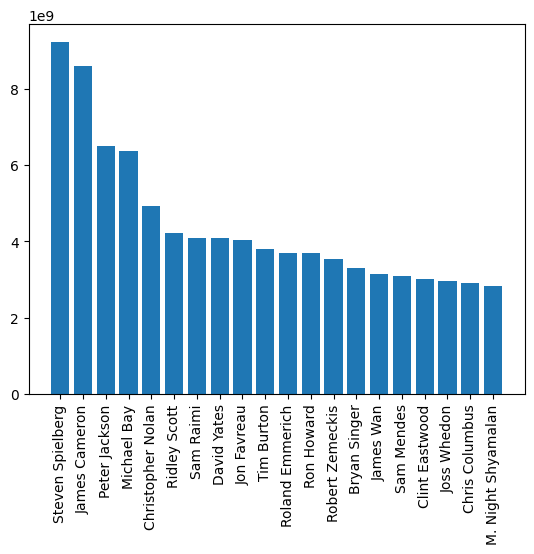

In [31]:
# Sort the dictionary by value in descending order
sorted_data = dict(sorted(directorsGross.items(), key=lambda x: x[1], reverse=True))

# Take the top 100 items
top_100 = dict(list(sorted_data.items())[:20])

plt.bar(top_100.keys(), top_100.values())
plt.xticks(rotation=90)
plt.show()

relación entre los directores y las ganancias globales